## **Predicting Disease Spread: Prediction comparison**

### **Imports**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
prophet_mean = pd.read_csv('../data/predictions/prophet_mean.csv')
arima = pd.read_csv('../data/predictions/arima.csv')
as_mean = pd.read_csv('../data/predictions/estimated_as_mean.csv')
prev_iter_rf = pd.read_csv('../data/predictions/prev_as_iterative_rf_sep_cities.csv')
ensemble_prophet_arima = pd.read_csv('../data/predictions/ensemble/prophet_arima.csv')

In [72]:
def plot_predictions(*predictions):
    """
    Plots predictions for San Juan and Iquitos on separate plots with all predictions.

    Parameters:
    predictions: List of tuples where each tuple contains:
        - prediction (pd.DataFrame): The prediction DataFrame.
        - mae (float): The Mean Absolute Error.
        - title (str): The title for the prediction.
    """
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 16), sharex=True)

    for prediction, mae, title in predictions:
        prediction['date'] = pd.to_datetime(prediction['year'].astype(str) + '-W' + prediction['weekofyear'].astype(str) + '-1', format='%Y-W%U-%w')
        sj_prediction = prediction[prediction['city'] == 'sj']
        iq_prediction = prediction[prediction['city'] == 'iq']

        sns.lineplot(data=sj_prediction, x="date", y='total_cases', ax=axes[0], label=f"{title} MAE: {mae}")
        sns.lineplot(data=iq_prediction, x="date", y='total_cases', ax=axes[1], label=f"{title} MAE: {mae}")

    axes[0].set_title('Predictions for San Juan')
    axes[0].legend()
    axes[1].set_title('Predictions for Iquitos')
    axes[1].legend()

    plt.tight_layout()


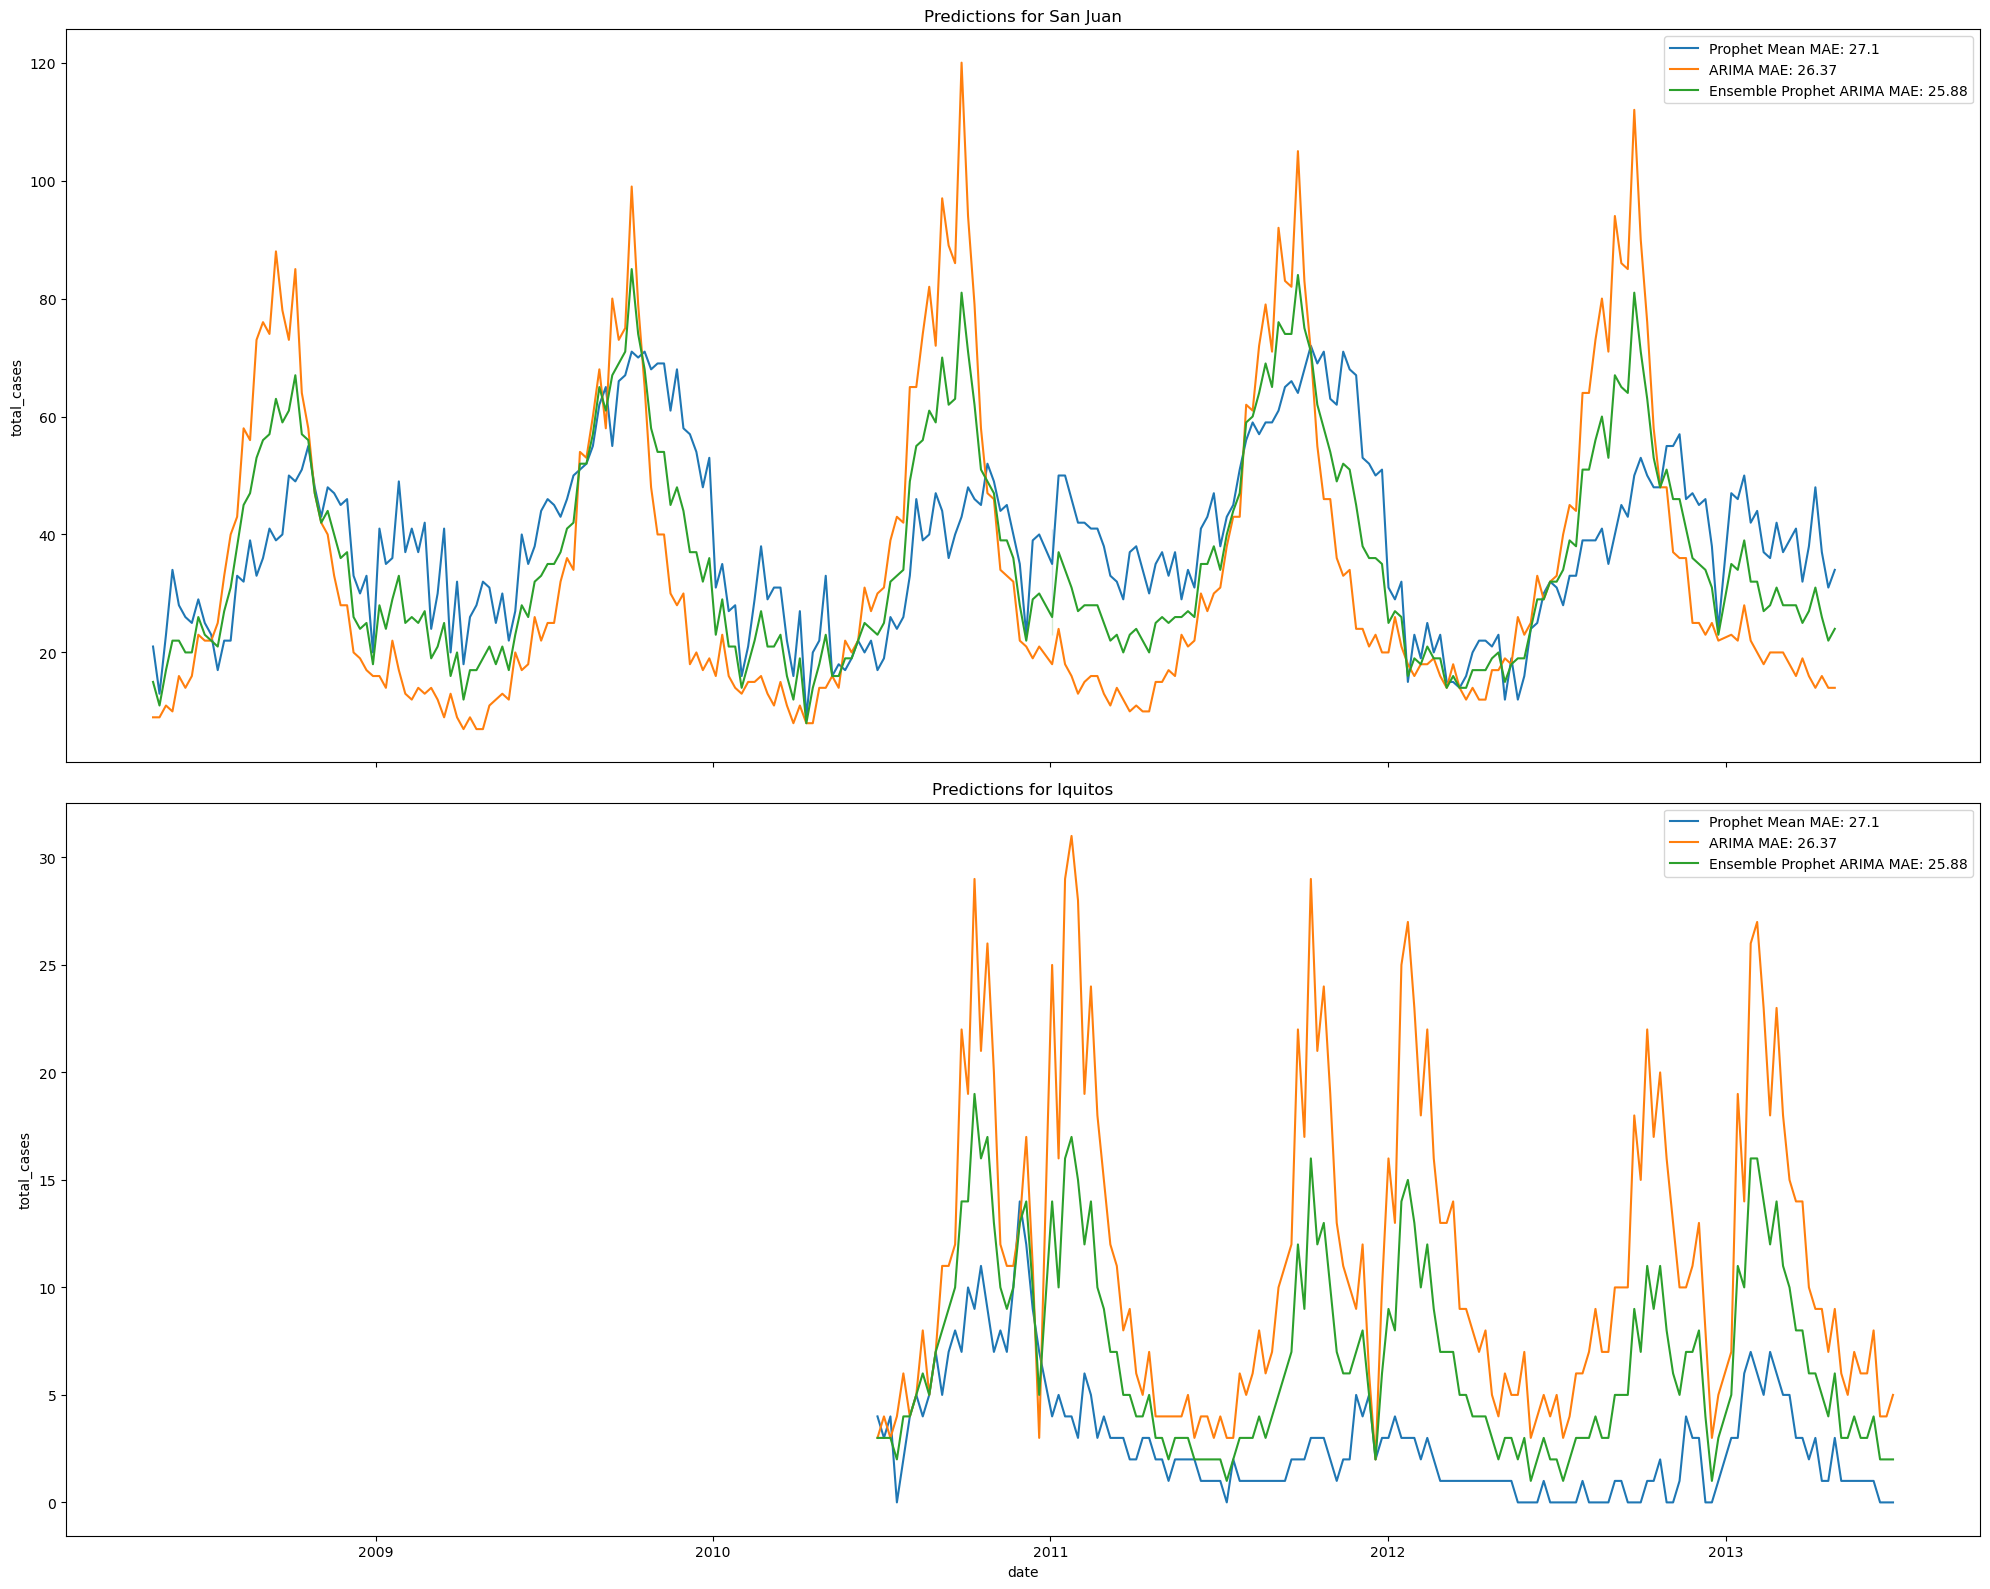

In [76]:
plot_predictions(
    (prophet_mean, 27.10, 'Prophet Mean'),
    (arima, 26.37, 'ARIMA'),
    # (prev_iter_rf, 26.75, 'Prev Iter RF'),
    # (as_mean, 26.24, 'AS Mean'),
    (ensemble_prophet_arima, 25.88, 'Ensemble Prophet ARIMA'),
)

In [67]:
def weighted_average(predictions, weights):
    """
    Computes the weighted average of predictions.

    Parameters:
    predictions (list): List of prediction DataFrames.
    weights (list): List of weights for each prediction.

    Returns:
    pd.DataFrame: DataFrame containing the weighted average predictions.
    """
    
    weighted_sum = sum(weight * pred['total_cases'] for weight, pred in zip(weights, predictions))
    total_weight = sum(weights)
    
    res = weighted_sum / total_weight
    res = res.astype(int)
    submission_format = pd.read_csv('../data/submission_format.csv')
    
    submission_format['total_cases'] = res
    return submission_format

In [69]:
df = weighted_average([prophet_mean, arima], [0.5, 0.5])
df.to_csv('../data/predictions/ensemble/prophet_arima.csv', index=False)